In [1]:
#import all necessary packages
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
import matplotlib.colors as mcolors
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import glob
import math
import pickle
import statistics
from sklearn import metrics
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

import keras
import talos
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot
from keras.layers import GaussianNoise
from keras.layers import Dropout
from keras.utils import np_utils
from keras.optimizers import Adam, Nadam

Using TensorFlow backend.


<a id='toc'></a>

# Goal

Create a model that accurately predicts the three types of rodent complaints:

1. Mouse Sighting  
2. Rat Sighting  
3. Signs of Rodents

# Table of Contents

### a. [Data Exploration](#de)

### b. [Data Cleaning/Choice of Analysis](#dc)

### c. [Feature Engineering and EDA](#fe)

### d. [Model testing and tuning](#mt)

### e. [Choice of model](#cm)

##### Throughout the notebook, there will be visualizations to explore the dataset as well as encourage or discourage certain decisions.

<a id='de'></a>

[Back to Top of Notebook](#toc)
## Data Exploration

To start the data investigation, I will look at avaiable raw data, the composition of its features regarding null values and datatype, as well as some summary statistics of the data. As our goal is to predict three classes, we will drop all rows whose complaints are categorized as 'Condition Attracting Rodents'.

In [2]:
#setting style for any visuals
plt.style.use('seaborn')
#loading in dataset
df = pd.read_csv('complaints.csv')
#drop any rows in which complaint is labelled as 'condition attracting rodents'
print('Descriptor before dropping unwanted rows:')
display(df.Descriptor.value_counts())
display(df.Descriptor.dtype)
df.drop(df[df.Descriptor == 'Condition Attracting Rodents'].index, axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)
print('Descriptor after dropping unwanted rows:')
display(df.Descriptor.value_counts())

Descriptor before dropping unwanted rows:


Rat Sighting                    1775
Condition Attracting Rodents     707
Mouse Sighting                   405
Signs of Rodents                 214
Name: Descriptor, dtype: int64

dtype('O')

Descriptor after dropping unwanted rows:


Rat Sighting        1775
Mouse Sighting       405
Signs of Rodents     214
Name: Descriptor, dtype: int64

In [3]:
#display descriptive statistics
display(df.head())
display(df.tail())
display(df.sample(10))
display(df.info())
display(np.round(df.describe()))
df.shape

,Unnamed: 0,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,0,34223255,09/01/2016 12:00:00 AM,09/02/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Catch Basin/Sewer,10037.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,34226273,09/01/2016 12:00:00 AM,01/24/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Vacant Lot,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,34213129,09/01/2016 12:00:00 AM,09/04/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11238.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.686677,-73.966167,"(40.68667651821694, -73.96616742133907)"
3,3,34214146,09/01/2016 12:00:00 AM,09/07/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11203.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.641241,-73.928234,"(40.641241249401865, -73.92823353964022)"
4,4,34216119,09/01/2016 12:00:00 AM,09/07/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11203.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.641263,-73.927318,"(40.64126263285648, -73.92731828387933)"


,Unnamed: 0,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
2389,183815,34443085,09/30/2016 12:00:00 AM,10/13/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11237.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.707179,-73.919885,"(40.70717898260812, -73.91988484970707)"
2390,183816,34443086,09/30/2016 12:00:00 AM,10/02/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10472.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.828400,-73.868439,"(40.828399922040205, -73.86843925521042)"
2391,183818,34443106,09/30/2016 12:00:00 AM,09/30/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10026.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.797808,-73.949584,"(40.797808149527235, -73.9495835671901)"
2392,183819,34443132,09/30/2016 12:00:00 AM,10/06/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10459.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.832562,-73.896581,"(40.832562134246665, -73.89658128613883)"
2393,183820,34443133,09/30/2016 12:00:00 AM,10/03/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11211.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.711349,-73.951171,"(40.711349332895544, -73.95117114409372)"


,Unnamed: 0,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
1545,119244,34367874,09/20/2016 12:00:00 AM,09/26/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,11435.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.702718,-73.814805,"(40.70271840289991, -73.8148046062906)"
1016,81836,34319456,09/14/2016 12:00:00 AM,09/19/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Vacant Building,11235.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.585639,-73.952959,"(40.58563900638928, -73.95295878913592)"
1908,152766,34402588,09/25/2016 12:00:00 AM,09/29/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Signs of Rodents,3+ Family Apt. Building,10467.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.858096,-73.869020,"(40.85809560497968, -73.8690203738398)"
1007,81825,34319348,09/14/2016 12:00:00 AM,09/19/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10473.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.809251,-73.858048,"(40.80925139644508, -73.85804817510484)"
2271,177602,34431482,09/29/2016 12:00:00 AM,10/20/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),10007.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.714928,-74.007940,"(40.714927605024464, -74.00793957864515)"
86,6337,34222221,09/02/2016 12:00:00 AM,09/10/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Construction Site,11205.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.693418,-73.952172,"(40.69341819769456, -73.95217234640155)"
2393,183820,34443133,09/30/2016 12:00:00 AM,10/03/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11211.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.711349,-73.951171,"(40.711349332895544, -73.95117114409372)"
2246,177570,34428266,09/29/2016 12:00:00 AM,10/06/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Signs of Rodents,3+ Family Apt. Building,10010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740302,-73.980723,"(40.74030153709773, -73.9807226797676)"
271,18309,34245955,09/04/2016 12:00:00 AM,09/08/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10026.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.806336,-73.955870,"(40.80633584769022, -73.95586958482606)"
2171,171155,34424419,09/28/2016 12:00:00 AM,09/28/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,3+ Family Apt. Building,11216.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670831,-73.951778,"(40.67083129686742, -73.95177758741323)"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      2394 non-null   int64  
 1   Unique Key                      2394 non-null   int64  
 2   Created Date                    2394 non-null   object 
 3   Closed Date                     2190 non-null   object 
 4   Agency                          2394 non-null   object 
 5   Agency Name                     2394 non-null   object 
 6   Complaint Type                  2394 non-null   object 
 7   Descriptor                      2394 non-null   object 
 8   Location Type                   2394 non-null   object 
 9   Incident Zip                    2390 non-null   float64
 10  Incident Address                2244 non-null   object 
 11  Street Name                     2244 non-null   object 
 12  Cross Street 1                  16

None

,Unnamed: 0,Unique Key,Incident Zip,Facility Type,X Coordinate (State Plane),Y Coordinate (State Plane),Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude
count,2394.0,2394.0,2390.0,0.0,2375.0,2375.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2375.0,2375.0
mean,94055.0,34333930.0,10691.0,NaN,1003055.0,208695.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,-74.0
std,54915.0,65456.0,767.0,NaN,19329.0,29504.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
min,0.0,34212040.0,83.0,NaN,922382.0,128763.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,-74.0
25%,42462.0,34274772.0,10065.0,NaN,993342.0,187268.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,-74.0
50%,95716.0,34337114.0,10469.0,NaN,1001344.0,205162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,-74.0
75%,141056.0,34390486.0,11226.0,NaN,1012661.0,235229.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,-74.0
max,183820.0,34443133.0,11694.0,NaN,1065171.0,269742.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,-74.0


(2394, 40)

When looking at the dispersion of our target variable, we find an unbalanced dataset with majority (74%) of the dataset being Rat Sightings.

From visualizing a few sample rows of our raw data, we can see that some of the columns have only one value for all rows and we have a lot of null values in certain columns. It is also apparent that there are marjority categorical features that we will one-hot encode later in the notebook, and very few continous variables (lat, long, x_coordinate, y_coordinate).

First step will be checking our unique service request key column to see if any duplicate requests exist in our dataset.

In [4]:
#Boolean output if any duplicates exist in ID column using .duplicated().any()
display(df['Unique Key'].duplicated().any())
#sum of duplicates using .duplicated().sum()
df['Unique Key'].duplicated().sum()

False

0

There are no duplicate submissions. Below, we check for null values in each column. Using the column descriptions from the additional information given along with highest and fewest two value counts of each column, we may start to decide how to handle the null values.

In [5]:
#sum of null values present in dataset per category using .isnull().sum()
df.isnull().sum()

Unnamed: 0                           0
Unique Key                           0
Created Date                         0
Closed Date                        204
Agency                               0
Agency Name                          0
Complaint Type                       0
Descriptor                           0
Location Type                        0
Incident Zip                         4
Incident Address                   150
Street Name                        150
Cross Street 1                     716
Cross Street 2                     717
Intersection Street 1             2246
Intersection Street 2             2246
Address Type                         3
City                                 4
Landmark                          2393
Facility Type                     2394
Status                               0
Due Date                             0
Resolution Description               0
Resolution Action Updated Date       0
Community Board                      0
Borough                  

In [6]:
#show value counts
for name in df.columns:
    print(name)
    display(df[name].value_counts().head(2))
    display(df[name].value_counts().tail(2))

Unnamed: 0


147347    1
42392     1
Name: Unnamed: 0, dtype: int64

35490    1
0        1
Name: Unnamed: 0, dtype: int64

Unique Key


34437119    1
34440945    1
Name: Unique Key, dtype: int64

34429612    1
34316288    1
Name: Unique Key, dtype: int64

Created Date


09/21/2016 12:00:00 AM    109
09/26/2016 12:00:00 AM    102
Name: Created Date, dtype: int64

09/10/2016 03:35:39 PM    1
09/10/2016 07:58:37 PM    1
Name: Created Date, dtype: int64

Closed Date


09/23/2016 12:00:00 AM    117
09/26/2016 12:00:00 AM    115
Name: Closed Date, dtype: int64

09/09/2016 04:20:06 PM    1
09/15/2016 09:28:11 AM    1
Name: Closed Date, dtype: int64

Agency


DOHMH    2394
Name: Agency, dtype: int64

DOHMH    2394
Name: Agency, dtype: int64

Agency Name


Department of Health and Mental Hygiene    2394
Name: Agency Name, dtype: int64

Department of Health and Mental Hygiene    2394
Name: Agency Name, dtype: int64

Complaint Type


Rodent    2394
Name: Complaint Type, dtype: int64

Rodent    2394
Name: Complaint Type, dtype: int64

Descriptor


Rat Sighting      1775
Mouse Sighting     405
Name: Descriptor, dtype: int64

Mouse Sighting      405
Signs of Rodents    214
Name: Descriptor, dtype: int64

Location Type


3+ Family Apt. Building    1079
1-2 Family Dwelling         445
Name: Location Type, dtype: int64

Public Stairs          2
Government Building    1
Name: Location Type, dtype: int64

Incident Zip


10128.0    57
11233.0    55
Name: Incident Zip, dtype: int64

11416.0    1
11426.0    1
Name: Incident Zip, dtype: int64

Incident Address


1025 BOYNTON AVENUE    18
95 EASTERN PARKWAY     14
Name: Incident Address, dtype: int64

1150 CLOVE ROAD         1
300 WEST   46 STREET    1
Name: Incident Address, dtype: int64

Street Name


EASTERN PARKWAY     30
EAST   88 STREET    22
Name: Street Name, dtype: int64

EAST  159 STREET    1
WEST   22 STREET    1
Name: Street Name, dtype: int64

Cross Street 1


BROADWAY    36
2 AVENUE    31
Name: Cross Street 1, dtype: int64

MILTON STREET    1
CLIFF STREET     1
Name: Cross Street 1, dtype: int64

Cross Street 2


BROADWAY    36
BEND        34
Name: Cross Street 2, dtype: int64

PAULDING AVENUE    1
122 AVENUE         1
Name: Cross Street 2, dtype: int64

Intersection Street 1


AMSTERDAM AVENUE    5
BROADWAY            4
Name: Intersection Street 1, dtype: int64

NEEDHAM AVENUE             1
ASTORIA BOULEVARD SOUTH    1
Name: Intersection Street 1, dtype: int64

Intersection Street 2


EAST 6 STREET    2
OCEAN AVENUE     2
Name: Intersection Street 2, dtype: int64

QUENTIN ROAD       1
WEST 126 STREET    1
Name: Intersection Street 2, dtype: int64

Address Type


ADDRESS    1572
LATLONG     590
Name: Address Type, dtype: int64

BLOCKFACE    81
PLACENAME     1
Name: Address Type, dtype: int64

City


BROOKLYN    743
NEW YORK    674
Name: City, dtype: int64

Cambria Heights    1
JACKSON HEIGHTS    1
Name: City, dtype: int64

Landmark


CENTRAL PARK    1
Name: Landmark, dtype: int64

CENTRAL PARK    1
Name: Landmark, dtype: int64

Facility Type


Series([], Name: Facility Type, dtype: int64)

Series([], Name: Facility Type, dtype: int64)

Status


Closed      2170
Assigned     148
Name: Status, dtype: int64

Assigned    148
Pending      76
Name: Status, dtype: int64

Due Date


10/09/2016 12:38:09 PM    2
10/07/2016 04:10:31 PM    1
Name: Due Date, dtype: int64

10/12/2016 11:12:55 PM    1
10/07/2016 07:33:13 AM    1
Name: Due Date, dtype: int64

Resolution Description


The Department of Health and Mental Hygiene will review your complaint to determine appropriate action.  Complaints of this type usually result in an inspection.  Please call 311 in 30 days from the date of your complaint for status                                                                    2393
The Department of Health and Mental Hygiene will review your complaint to determine appropriate action.  Complaints of this type usually result in an inspection.  Please call 311 in 30 days from the date of your complaint for status.  Please note your Service Request number for future reference.       1
Name: Resolution Description, dtype: int64

The Department of Health and Mental Hygiene will review your complaint to determine appropriate action.  Complaints of this type usually result in an inspection.  Please call 311 in 30 days from the date of your complaint for status                                                                    2393
The Department of Health and Mental Hygiene will review your complaint to determine appropriate action.  Complaints of this type usually result in an inspection.  Please call 311 in 30 days from the date of your complaint for status.  Please note your Service Request number for future reference.       1
Name: Resolution Description, dtype: int64

Resolution Action Updated Date


09/26/2016 12:00:00 AM    82
09/21/2016 12:00:00 AM    77
Name: Resolution Action Updated Date, dtype: int64

09/30/2016 05:04:44 PM    1
09/15/2016 09:28:11 AM    1
Name: Resolution Action Updated Date, dtype: int64

Community Board


Unspecified MANHATTAN    268
Unspecified BROOKLYN     226
Name: Community Board, dtype: int64

11 BROOKLYN    2
55 BROOKLYN    1
Name: Community Board, dtype: int64

Borough


BROOKLYN     745
MANHATTAN    680
Name: Borough, dtype: int64

QUEENS           382
STATEN ISLAND    104
Name: Borough, dtype: int64

X Coordinate (State Plane)


1018209.0    18
1008057.0    12
Name: X Coordinate (State Plane), dtype: int64

1004104.0    1
993296.0     1
Name: X Coordinate (State Plane), dtype: int64

Y Coordinate (State Plane)


239723.0    18
187504.0    12
Name: Y Coordinate (State Plane), dtype: int64

181337.0    1
228352.0    1
Name: Y Coordinate (State Plane), dtype: int64

Park Facility Name


Unspecified    2394
Name: Park Facility Name, dtype: int64

Unspecified    2394
Name: Park Facility Name, dtype: int64

Park Borough


BROOKLYN     745
MANHATTAN    680
Name: Park Borough, dtype: int64

QUEENS           382
STATEN ISLAND    104
Name: Park Borough, dtype: int64

Vehicle Type


Series([], Name: Vehicle Type, dtype: int64)

Series([], Name: Vehicle Type, dtype: int64)

Taxi Company Borough


Series([], Name: Taxi Company Borough, dtype: int64)

Series([], Name: Taxi Company Borough, dtype: int64)

Taxi Pick Up Location


Series([], Name: Taxi Pick Up Location, dtype: int64)

Series([], Name: Taxi Pick Up Location, dtype: int64)

Bridge Highway Name


Series([], Name: Bridge Highway Name, dtype: int64)

Series([], Name: Bridge Highway Name, dtype: int64)

Bridge Highway Direction


Series([], Name: Bridge Highway Direction, dtype: int64)

Series([], Name: Bridge Highway Direction, dtype: int64)

Road Ramp


Series([], Name: Road Ramp, dtype: int64)

Series([], Name: Road Ramp, dtype: int64)

Bridge Highway Segment


Series([], Name: Bridge Highway Segment, dtype: int64)

Series([], Name: Bridge Highway Segment, dtype: int64)

Latitude


40.824595    18
40.681300    12
Name: Latitude, dtype: int64

40.575938    1
40.835559    1
Name: Latitude, dtype: int64

Longitude


-73.877299    18
-73.914165    12
Name: Longitude, dtype: int64

-73.950409    1
-73.929997    1
Name: Longitude, dtype: int64

Location


(40.824594531459304, -73.8772991398564)     18
(40.681299916357254, -73.91416525956775)    12
Name: Location, dtype: int64

(40.81211214707213, -73.91822321248348)    1
(40.73242775257853, -73.98728828641892)    1
Name: Location, dtype: int64

Some of our data have only one or two different values such as Agency and Agency Name. Some of our features have no information like Vehicle Type. Others have a few null values that may be due to missing information collected or because that information simply doesn't exist for that incident.

We will address repetitive columns, missing data and variable extraction below.

<a id='dc'></a>

[Back to Top of Notebook](#toc)
## Data Cleaning/Choice of Analysis

Having lived in NYC in both Queens and Manhattan for the past 20 years, I know that location is very important when considering the presence of rats or mice. I will try to focus on gathering relevant descriptive features to highlight difference in location for the rows to predict incident case, as well as responsiveness from the agency to resolve the issues.

I first want rows that contain information on Longitude, Latitude, Zip Code and Addresses. We will decide how to proceed with this information later in the notebook, but first we drop the few rows with missing data as it will not affect sample size.

Then we drop any columns that don't provide additional information on Location, contain a large number of missing data, or are duplicates of other features. The reasons for why we drop each specific row is listed below.

In [7]:
#drop rows where Longitude, Latitude, City and Incident Zip are null
df.drop(df[df.Longitude.isnull()].index, axis = 0, inplace = True)
df.drop(df[df.Latitude.isnull()].index, axis = 0, inplace = True)
df.drop(df[df.City.isnull()].index, axis = 0, inplace = True)
df.drop(df[df['Incident Zip'].isnull()].index, axis = 0, inplace = True)
df.drop(df[df['Incident Address'].isnull()].index, axis = 0, inplace = True)
df.drop(df[df['Street Name'].isnull()].index, axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)

#The first 9 columns are dropped because they are either all null or have one row of data
#Complaint Type, Agency, Agency Name, Park Facility Name and Resolution Description have one value only
#We drop Unique Key because it does not provide any information related to incident other than uniqueness of entry
#We drop Incident Address, Street Name and Address Type as information on Location is represented in other forms
#We drop X and Y Coordinate (State Plane) and Location, as we only need Lat and Long of Location as well as Zip
#We drop Park Borough as it is equal as the Borough column
#We drop Community Board as we will bin our zipcodes later according to NYS Department of Health
#We drop Closed Date and Due Date as we will use Resolution Action Date and Created Date for Date specific info
#Drop Unnamed: 0 column as it refers to index already set
df.drop(['Facility Type', 'Landmark', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
         'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
         'Complaint Type', 'Agency', 'Agency Name', 'Park Facility Name', 'Resolution Description',
         'Unique Key',
         'Incident Address', 'Street Name', 'Address Type',
         'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Location',
         'Park Borough',
         'Community Board',
         'Closed Date', 'Due Date',
         'Unnamed: 0'],
        axis = 1, inplace = True)

In [8]:
#show value counts and dataframe info
df.info()
print()
for name in df.columns[df.isna().any()].tolist():
    print(name)
    display(df[name].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Created Date                    2226 non-null   object 
 1   Descriptor                      2226 non-null   object 
 2   Location Type                   2226 non-null   object 
 3   Incident Zip                    2226 non-null   float64
 4   Cross Street 1                  1637 non-null   object 
 5   Cross Street 2                  1636 non-null   object 
 6   Intersection Street 1           0 non-null      object 
 7   Intersection Street 2           0 non-null      object 
 8   City                            2226 non-null   object 
 9   Status                          2226 non-null   object 
 10  Resolution Action Updated Date  2226 non-null   object 
 11  Borough                         2226 non-null   object 
 12  Latitude                        22

BROADWAY                         34
2 AVENUE                         31
BEND                             31
YORK AVENUE                      26
AMSTERDAM AVENUE                 23
                                 ..
CROCHERON AVENUE                  1
ADAM CLAYTON POWELL BOULEVARD     1
BAY PARKWAY                       1
211 STREET                        1
CLIFF STREET                      1
Name: Cross Street 1, Length: 722, dtype: int64

Cross Street 2


BROADWAY           36
1 AVENUE           34
BEND               33
EAST END AVENUE    26
WATSON AVENUE      20
                   ..
63 STREET           1
PAULDING AVENUE     1
130 PLACE           1
WEST 180 STREET     1
122 AVENUE          1
Name: Cross Street 2, Length: 721, dtype: int64

Intersection Street 1


Series([], Name: Intersection Street 1, dtype: int64)

Intersection Street 2


Series([], Name: Intersection Street 2, dtype: int64)

Now that we have our relevant features, let us handle the rest of the missing data.

Since our missing values are only related to cross and intersection streets, I will plot types of incidences and location types (housing type) over a map of NYC to see if I should keep this data.

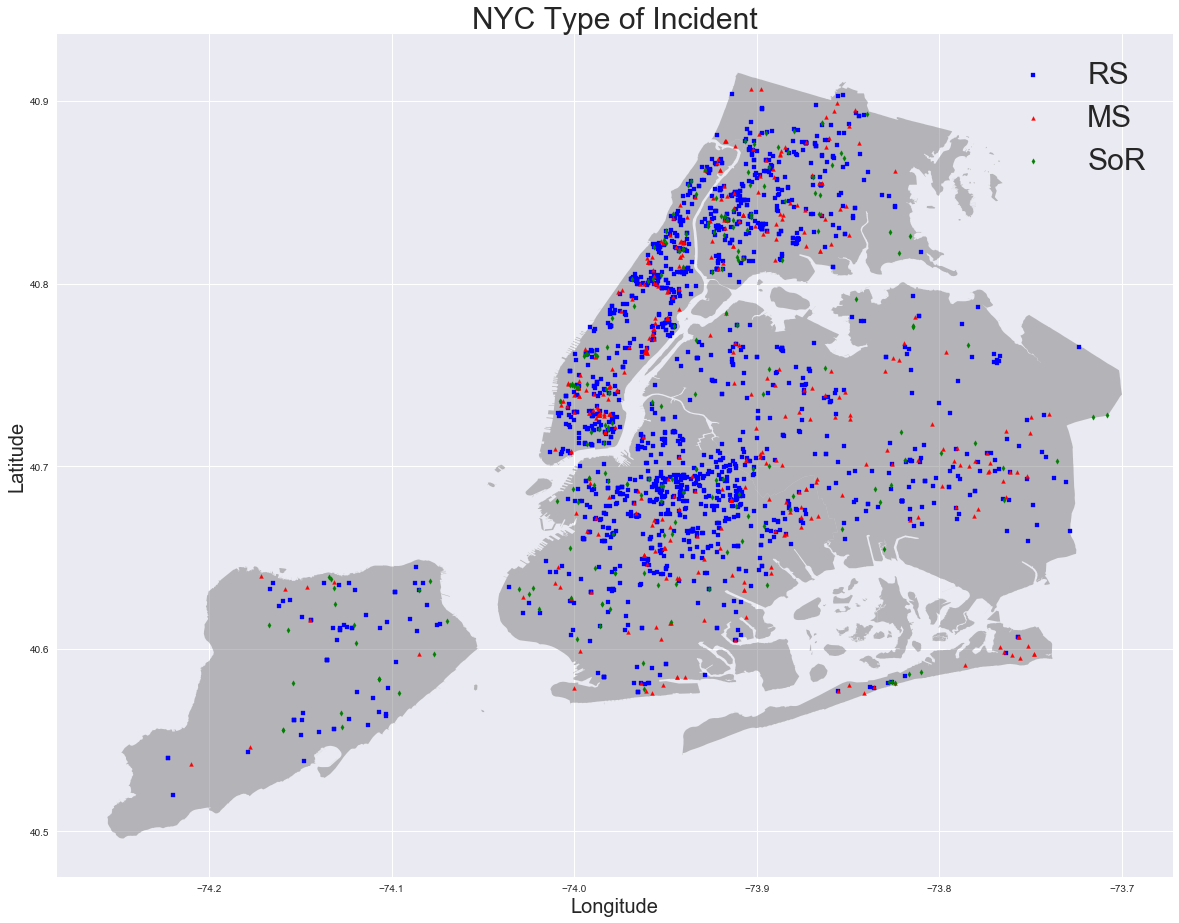

In [9]:
#using GeoDataFrame, we will plot points on our shp file of nyc
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
geo_df = gpd.GeoDataFrame(df,
                          crs = crs,
                          geometry = geometry)

street_map = gpd.read_file('nyc.shp')
fig, ax = plt.subplots(figsize = (20,20))
street_map.plot(ax=ax, alpha = 0.5, color = 'grey')
geo_df[geo_df.Descriptor == 'Rat Sighting'].plot(ax = ax, markersize = 15, color = 'blue', marker = 's', label = 'RS')
geo_df[geo_df.Descriptor == 'Mouse Sighting'].plot(ax = ax, markersize = 15, color = 'red', marker = '^', label = 'MS')
geo_df[geo_df.Descriptor == 'Signs of Rodents'].plot(ax = ax, markersize = 15, color = 'green', marker = 'd', label = 'SoR')
plt.legend(prop = {'size': 30})
ax.set_xlabel('Longitude', fontsize=20)
ax.set_ylabel('Latitude', fontsize=20)
ax.set_title('NYC Type of Incident', fontsize=30)
fig.show()
    
fig.savefig('nyctypeofincident.png')

As our dataset is majority Rat Sightings, we see a lot of data points that are blue squares, with few being simply signs of rodents. However, one thing to notice is the proliferation of rat sightings in more dense, urban areas in NYC than in others. Near Central Brooklyn in Brooklyn and specifically Downtown and in Harlem in Manhattan, we see a lot of Rat Sighting incidences reported. This is contrary to Staten Island and further into Queens, with more residential areas in more suburban neighborhoods, we see less Rat incidences reported and a more balanced graph.

,Type,Count
0,3+ Family Apt. Building,1071
1,1-2 Family Dwelling,437
2,Other (Explain Below),253
3,3+ Family Mixed Use Building,128
4,Commercial Building,113
5,Vacant Lot,61
6,Construction Site,53
7,Vacant Building,43
8,1-2 Family Mixed Use Building,26
9,Parking Lot/Garage,13


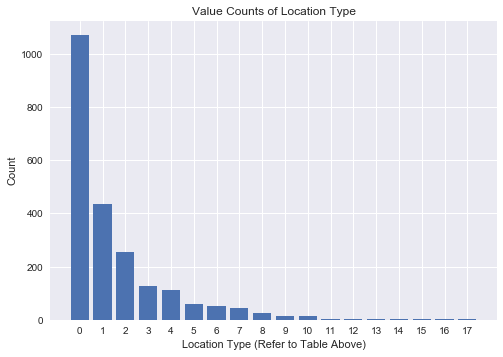

In [10]:
#describe value count of Location Type
display(pd.DataFrame(df['Location Type'].value_counts()).reset_index().rename(columns={'index': 'Type', 'Location Type': 'Count'}))
plt.plot(figsize = (15,15))
plt.xticks(range(0,18))
plt.xlabel('Location Type (Refer to Table Above)')
plt.ylabel('Count')
plt.title('Value Counts of Location Type')
plt.bar(range(0,18), df['Location Type'].value_counts())
plt.show()

Most of our dataset is reported from large apartment buildings, most likely residing in Manhattan. This is followed by other family buildings, whereas the least is reported from public areas. This is either due to the fact that more people attract more rats and mice, since there is more trash and resources for rats and mice to be around, or this is because people are not regularly in these public areas and are more likely to catch or see a Rat or a Mouse near their homes.

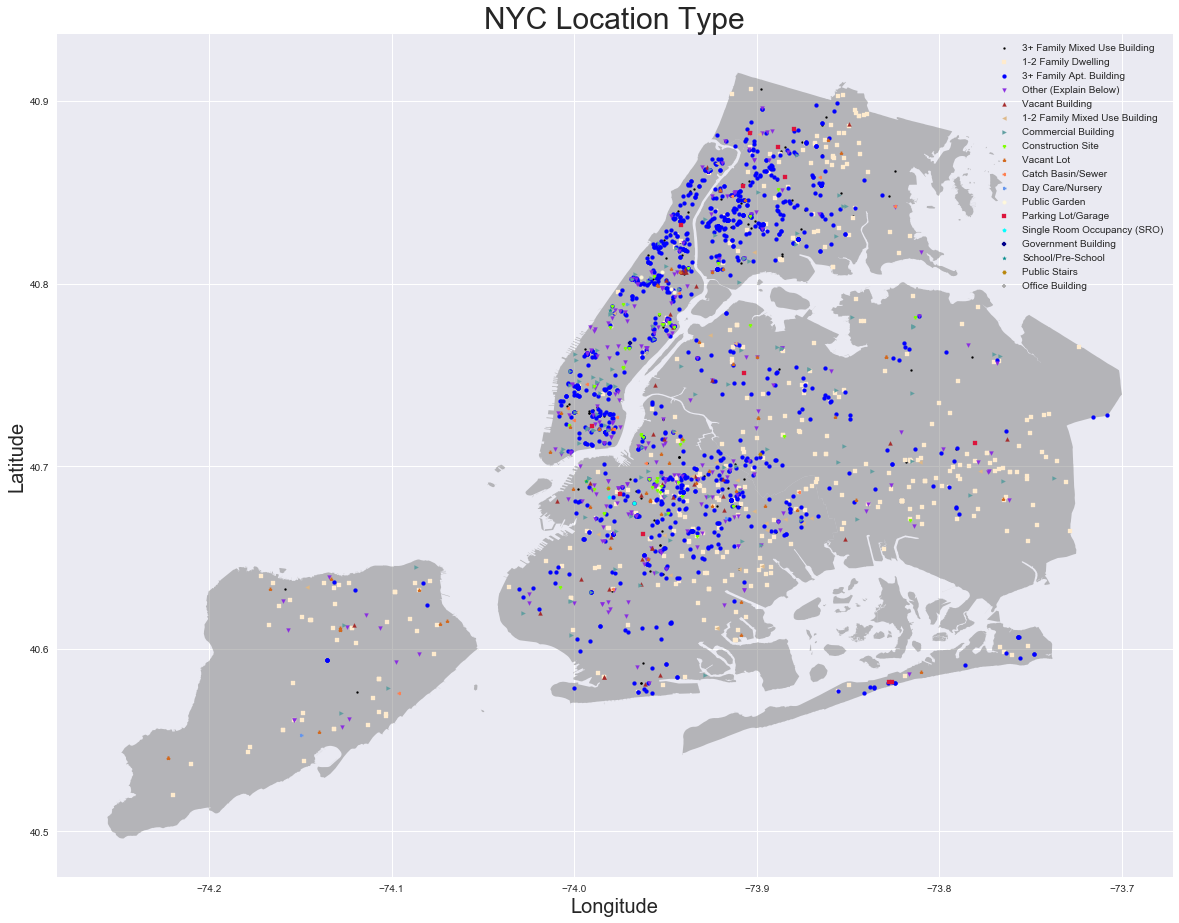

In [11]:
#set dictionary and list of colors needed
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
colors1 = list(colors.keys())[15:33]

#set markers
markers = [".", ",", "o", "v", "^", "<", ">", "1",
 "2", "3", "4", "8", "s", "p", "P", "*", "H", "+"]

#using GeoDataFrame, we will plot points on our shp file of nyc
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
geo_df = gpd.GeoDataFrame(df,
                          crs = crs,
                          geometry = geometry)

street_map = gpd.read_file('nyc.shp')
fig, ax = plt.subplots(figsize = (20,20))
street_map.plot(ax=ax, alpha = 0.5, color = 'grey')

for comb in zip(list(df['Location Type'].unique()), colors1, markers):
    geo_df[geo_df['Location Type'] == comb[0]].plot(ax = ax, markersize = 15, color = comb[1], marker = comb[2], label = comb[0])
plt.legend(prop = {'size': 10})
ax.set_xlabel('Longitude', fontsize=20)
ax.set_ylabel('Latitude', fontsize=20)
ax.set_title('NYC Location Type', fontsize=30)
fig.show()

fig.savefig('nyclocationtype.png')
    
df.drop('geometry', axis = 1, inplace = True)

When looking at the breakdown of location type, we see that the high number of reported incidences from a 3+ Family Apt Building were concentrated in Brooklyn, Manhattan and the Bronx. This visual supports the idea that a more concentrated, urban area will attract more rats and mice, or will lead to more incidences having taken place.

This leads to my decision to include Cross Street and Intersection Street information in my model. However, after looking at some sample rows of the data, it seems as if the reason there are missing values is because some of these locations do not have Cross Streets, like a suburban house. Therefore, to handle our missing data, I will drop Intersection Street 1 and 2, and making a new feature in which values represent True if the location has a Cross Street or False if it does not.

Similarly, below we see that the response of the agency to these incidences is quick, but some reports are still left open or pending. Therefore, since majority are closed, I will also make a boolean type feature denoting if the case was closed or not.

In [12]:
df.Status.value_counts()

Closed      2013
Assigned     142
Pending       71
Name: Status, dtype: int64

In [13]:
#changing Status column to state whether case is closed or not
for idx, val in enumerate(df.Status):
    if val == 'Closed':
        df.loc[idx, 'Status'] = True
    else:
        df.loc[idx, 'Status'] = False

df['Cross Street 1'] = df['Cross Street 1'].isnull()
df['Cross Street 2'] = df['Cross Street 2'].isnull()

#combining Cross Street data
for idx, val in enumerate(df['Cross Street 1']):
    if (val == False) or (df['Cross Street 2'].iloc[idx] == False):
        df.loc[idx, 'Cross Street'] = True
    else:
        df.loc[idx, 'Cross Street'] = False

#use astype.(bool) to change to bool type
df['Status'] = df['Status'].astype(bool)
df['Cross Street'] = df['Cross Street'].astype(bool)

#drop unwanted columns
df.drop(['Cross Street 1', 'Cross Street 2',
         'Intersection Street 1', 'Intersection Street 2'], axis = 1, inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Created Date                    2226 non-null   object 
 1   Descriptor                      2226 non-null   object 
 2   Location Type                   2226 non-null   object 
 3   Incident Zip                    2226 non-null   float64
 4   City                            2226 non-null   object 
 5   Status                          2226 non-null   bool   
 6   Resolution Action Updated Date  2226 non-null   object 
 7   Borough                         2226 non-null   object 
 8   Latitude                        2226 non-null   float64
 9   Longitude                       2226 non-null   float64
 10  Cross Street                    2226 non-null   bool   
dtypes: bool(2), float64(3), object(6)
memory usage: 161.0+ KB


Now that we have no more missing data, we will begin feature engineering any new variables, one-hot encode our categorical data and scale our continous variables.

<a id='fe'></a>

[Back to Top of Notebook](#toc)
## Feature Engineering and EDA

Continuing the importance of location in influencing incident type, instead of leaving zipcode as seperate values, I will bin them by neighborhood of NYC according to NYS Department of Health. I have created 42 total bins, including all possible zipcodes from our dataset and others found from the NYS Department of Health. Since Central Park is labelled 83, I have made that its own bin and the other zipcodes that are close to water and not considered in a neighborhood by NYS Department of Health have been placed in the appropriate neighborhood based on proximity to other zipcodes.

The idea to bin zip codes is to limit model complexity as well as group specific incidences together to highlight the difference of urban areas and suburban areas.

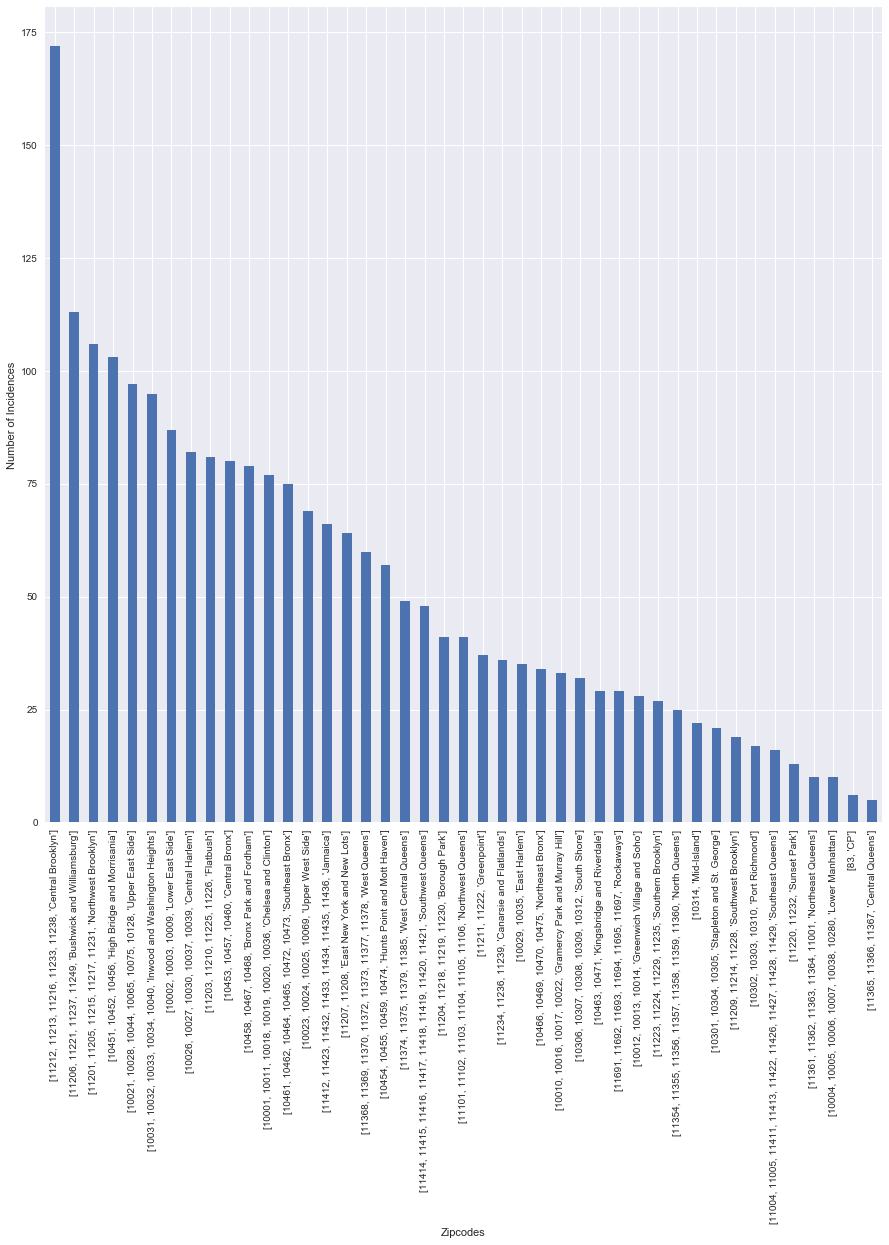

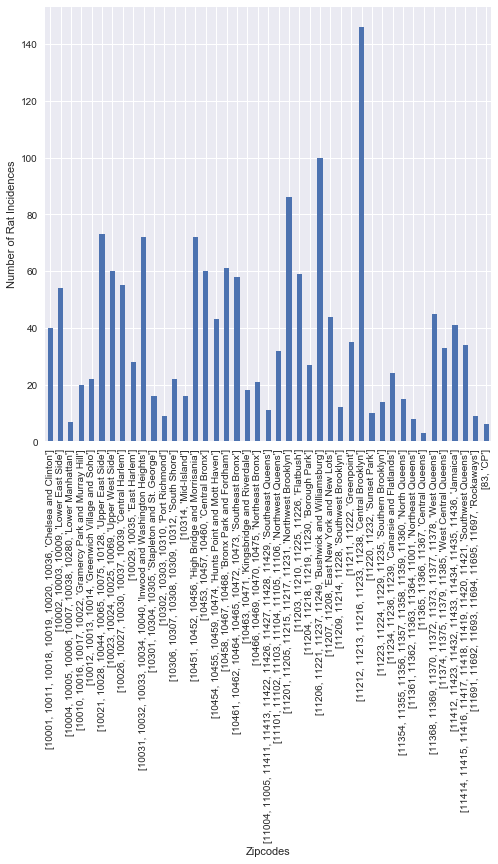

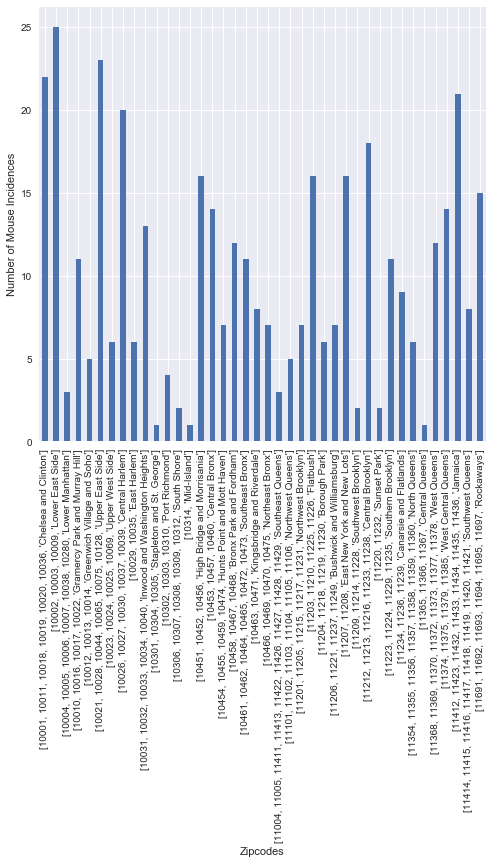

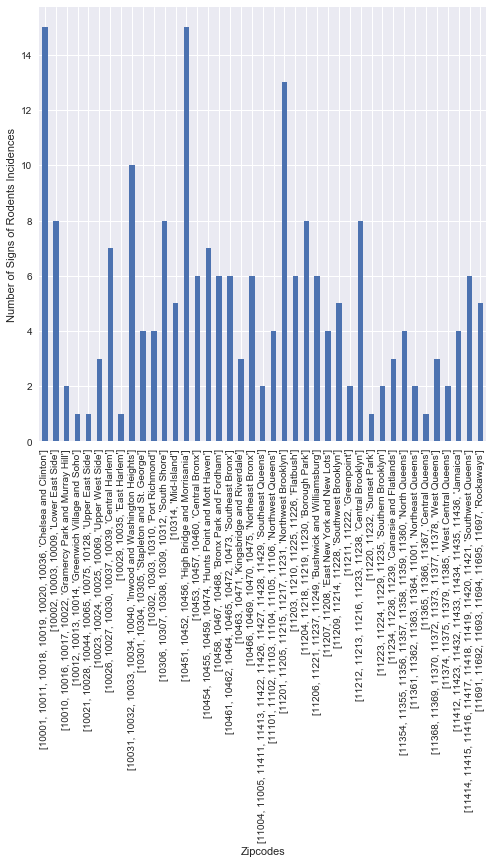

In [15]:
#create bins according to NYS Department of Health
b1 = [10453, 10457, 10460, 'Central Bronx']
b2 = [10458, 10467, 10468, 'Bronx Park and Fordham']
b3 = [10451, 10452, 10456, 'High Bridge and Morrisania']
b4 = [10454, 10455, 10459, 10474, 'Hunts Point and Mott Haven']
b5 = [10463, 10471, 'Kingsbridge and Riverdale']
b6 = [10466, 10469, 10470, 10475, 'Northeast Bronx']
b7 = [10461, 10462,10464, 10465, 10472, 10473, 'Southeast Bronx']
b8 = [11212, 11213, 11216, 11233, 11238, 'Central Brooklyn']
b9 = [11209, 11214, 11228, 'Southwest Brooklyn']
b10 = [11204, 11218, 11219, 11230, 'Borough Park']
b11 = [11234, 11236, 11239, 'Canarsie and Flatlands']
b12 = [11223, 11224, 11229, 11235, 'Southern Brooklyn']
b13 = [11201, 11205, 11215, 11217, 11231, 'Northwest Brooklyn']
b14 = [11203, 11210, 11225, 11226, 'Flatbush']
b15 = [11207, 11208, 'East New York and New Lots']
b16 = [11211, 11222, 'Greenpoint']
b17 = [11220, 11232, 'Sunset Park']
b18 = [11206, 11221, 11237, 11249, 'Bushwick and Williamsburg']
b19 = [10026, 10027, 10030, 10037, 10039, 'Central Harlem']
b20 = [10001, 10011, 10018, 10019, 10020, 10036, 'Chelsea and Clinton']
b21 = [10029, 10035, 'East Harlem']
b22 = [10010, 10016, 10017, 10022, 'Gramercy Park and Murray Hill']
b23 = [10012, 10013, 10014, 'Greenwich Village and Soho']
b24 = [10004, 10005, 10006, 10007, 10038, 10280, 'Lower Manhattan']
b25 = [10002, 10003, 10009, 'Lower East Side']
b26 = [10021, 10028, 10044, 10065, 10075, 10128, 'Upper East Side']
b27 = [10023, 10024, 10025, 10069, 'Upper West Side']
b28 = [10031, 10032, 10033, 10034, 10040, 'Inwood and Washington Heights']
b29 = [11361, 11362, 11363, 11364, 11001, 'Northeast Queens']
b30 = [11354, 11355, 11356, 11357, 11358, 11359, 11360, 'North Queens']
b31 = [11365, 11366, 11367, 'Central Queens']
b32 = [11412, 11423, 11432, 11433, 11434, 11435, 11436, 'Jamaica']
b33 = [11101, 11102, 11103, 11104, 11105, 11106, 'Northwest Queens']
b34 = [11374, 11375, 11379, 11385, 'West Central Queens']
b35 = [11691, 11692, 11693, 11694, 11695, 11697, 'Rockaways']
b36 = [11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429, 'Southeast Queens']
b37 = [11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421, 'Southwest Queens']
b38 = [11368, 11369, 11370, 11372, 11373, 11377, 11378, 'West Queens']
b39 = [10302, 10303, 10310, 'Port Richmond']
b40 = [10306, 10307, 10308, 10309, 10312, 'South Shore']
b41 = [10301, 10304, 10305, 'Stapleton and St. George']
b42 = [10314, 'Mid-Island']
b43 = [83, 'CP']

#for loop appending bin list names
binslist = []
for x in range(1,44):
    exec(f"binslist.append(b{x})")

df['Incident Zip'] = df['Incident Zip'].astype('int64')

#create new columns for count of zipcodes
for idx, val in enumerate(df['Incident Zip']):
    count = 0
    for binname in binslist:
        if val in binname:
            df.loc[idx, 'Zipcodes'] = str(binname)
            df.loc[idx, 'ZipcodeBins'] = count
        else:
            count += 1

#plot relevant graphs
ax1 = df['Zipcodes'].value_counts().plot(kind='bar', figsize = (15,15))
plt.xlabel('Zipcodes')
plt.ylabel('Number of Incidences')
plt.show()

ax2 = df[df['Descriptor'] == 'Rat Sighting'].groupby(['Zipcodes'])['Descriptor'].count().plot(kind='bar', figsize = (8,8))
plt.xlabel('Zipcodes')
plt.ylabel('Number of Rat Incidences')
plt.show()

ax3 = df[df['Descriptor'] == 'Mouse Sighting'].groupby(['Zipcodes'])['Descriptor'].count().plot(kind='bar', figsize = (8,8))
plt.xlabel('Zipcodes')
plt.ylabel('Number of Mouse Incidences')
plt.show()

ax4 = df[df['Descriptor'] == 'Signs of Rodents'].groupby(['Zipcodes'])['Descriptor'].count().plot(kind='bar', figsize = (8,8))
plt.xlabel('Zipcodes')
plt.ylabel('Number of Signs of Rodents Incidences')
plt.show()

ax1.figure.savefig('NumIncidences.png')
ax2.figure.savefig('NumRatIncidences.png')
ax3.figure.savefig('NumMousIncidences.png')
ax4.figure.savefig('NumSORIncidences.png')

#create dummy variables for zipcode bins
df['ZipcodeBins'] = df['ZipcodeBins'].astype('category')
df['ZipcodeBins'] = df['ZipcodeBins'].cat.codes
#create dummy variable categories and drop first to eliminate dummy variable trap
zips_dummy = pd.get_dummies(df['ZipcodeBins'], prefix="zip", drop_first = True)
#drop variables
df.drop(['Incident Zip', 'Zipcodes', 'ZipcodeBins'], axis=1, inplace = True)
df = pd.concat([df, zips_dummy], axis=1)

Overall, most of our reports have come from Central Brooklyn by a large margin. For Rat sightings, most of our reports are from Central Brooklyn, for Mouse Sightings, most of our reports are from Lower East Side, and for Signs of Rodents, most of our reports are from both Chelsea and Clinton, and Highbridge and Morrisania in the Bronx.

I have dropped the useless columns and have appended new dummy features for our various zipcode bins.

Below, I will deal with our datetime features, by converting them into time taken to take action on report (in seconds), and day of the week the incident took place. In our graphs below, we may see a difference in days the incidences were created, thus we will keep that representation of created date instead of the date itself.

In [16]:
#find the difference in dates
df['Time To React'] = ((pd.to_datetime(df['Resolution Action Updated Date']) - pd.to_datetime(df['Created Date']))).dt.total_seconds()

In [17]:
#create dictionary for days of week
day = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
       4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
#map date to day of the week
df['Day'] = pd.to_datetime(df['Created Date']).dt.dayofweek.map(day)

#drop unecessary columns
df.drop(['Resolution Action Updated Date', 'Created Date'], axis = 1, inplace = True)

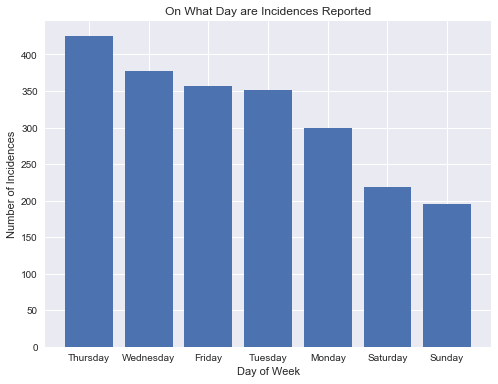

In [18]:
#plot relevant graphs on reported incidences and day of week
fig = plt.figure(figsize = (8,6))
plt.bar(df.Day.value_counts().index, df.Day.value_counts().values)
plt.title('On What Day are Incidences Reported')
plt.xlabel('Day of Week')
plt.ylabel('Number of Incidences')
plt.show()

fig.savefig('DayIncidencesReported.png')

For all incidences, we see most are reported at the end of the week, during downtime from work.

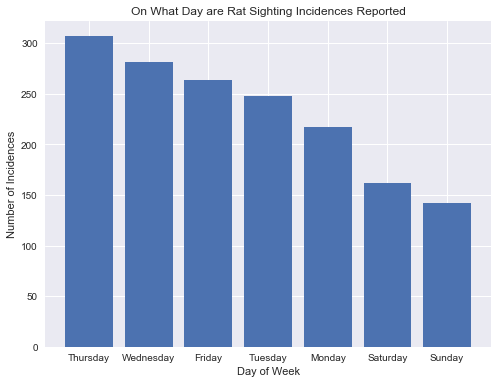

In [19]:
fig = plt.figure(figsize = (8,6))
plt.bar(df[df.Descriptor == 'Rat Sighting'].Day.value_counts().index, df[df.Descriptor == 'Rat Sighting'].Day.value_counts().values)
plt.title('On What Day are Rat Sighting Incidences Reported')
plt.xlabel('Day of Week')
plt.ylabel('Number of Incidences')
plt.show()

fig.savefig('DayRatReported.png')

For Rat sightings, we see similar data to the whole dataset as this makes up most of our data.

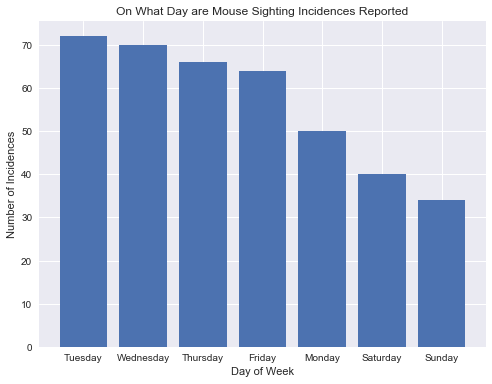

In [20]:
fig = plt.figure(figsize = (8,6))
plt.bar(df[df.Descriptor == 'Mouse Sighting'].Day.value_counts().index, df[df.Descriptor == 'Mouse Sighting'].Day.value_counts().values)
plt.title('On What Day are Mouse Sighting Incidences Reported')
plt.xlabel('Day of Week')
plt.ylabel('Number of Incidences')
plt.show()

fig.savefig('DayMouseReported.png')

For Mouse sightings, we see a difference as Tuesdays are the most popular day to report an incident. This is very different from Rat sightings as Tuesday was the fourth most popular day.

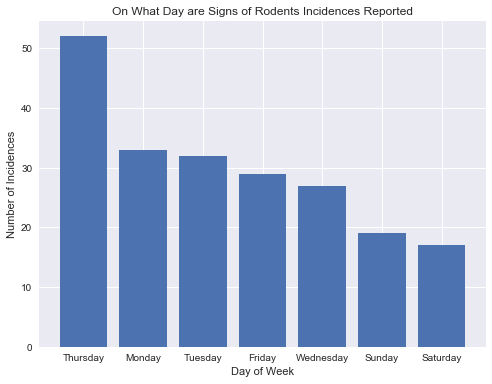

In [21]:
fig = plt.figure(figsize = (8,6))
plt.bar(df[df.Descriptor == 'Signs of Rodents'].Day.value_counts().index, df[df.Descriptor == 'Signs of Rodents'].Day.value_counts().values)
plt.title('On What Day are Signs of Rodents Incidences Reported')
plt.xlabel('Day of Week')
plt.ylabel('Number of Incidences')
plt.show()

fig.savefig('DaySORReported.png')

For Signs of Rodent incidences reported, it is clear that most of the reported days fell on Thursday, but the order of the rest differs from both Mouse and Rat reports, having the end of week be the least popular days.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Descriptor     2226 non-null   object 
 1   Location Type  2226 non-null   object 
 2   City           2226 non-null   object 
 3   Status         2226 non-null   bool   
 4   Borough        2226 non-null   object 
 5   Latitude       2226 non-null   float64
 6   Longitude      2226 non-null   float64
 7   Cross Street   2226 non-null   bool   
 8   zip_1          2226 non-null   uint8  
 9   zip_2          2226 non-null   uint8  
 10  zip_3          2226 non-null   uint8  
 11  zip_4          2226 non-null   uint8  
 12  zip_5          2226 non-null   uint8  
 13  zip_6          2226 non-null   uint8  
 14  zip_7          2226 non-null   uint8  
 15  zip_8          2226 non-null   uint8  
 16  zip_9          2226 non-null   uint8  
 17  zip_10         2226 non-null   uint8  
 18  zip_11  

Below, we will one-hot encode our catgeorical data and standardize our continous variables to improve analysis of data in model. I use MinMaxScaler to preserve the shape of the original distribution of the continuous data.

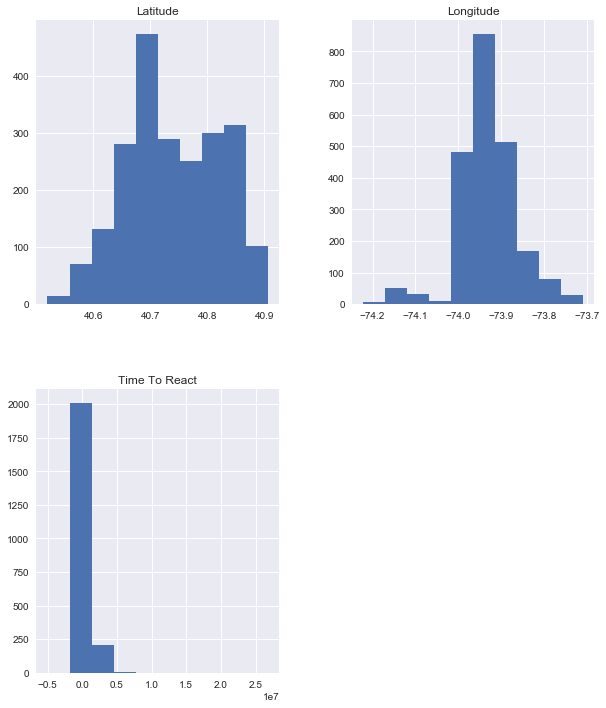

In [23]:
#make dataframe for categorical data
feat_cat = pd.concat([df.City, df.Borough, df['Location Type'], df.Day], axis=1)
#make dataframe for continuous data
feat_cont = pd.concat([df.Longitude, df.Latitude, df['Time To React']], axis=1)
#plot histogram of long, lat data
feat_cont.hist(figsize=(10,12));

In [24]:
#create dummy variable features and drop the first to eliminate dummy variable trap using pd.get_dummies for certain data
borough = pd.get_dummies(feat_cat.Borough, prefix='borough', drop_first=True)
city = pd.get_dummies(feat_cat.City, prefix='city', drop_first=True)
locationtype = pd.get_dummies(feat_cat['Location Type'], prefix='locationtype')
day = pd.get_dummies(feat_cat.Day, prefix='day', drop_first = True)

In [25]:
#scale data
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(feat_cont)
scaled_df = pd.DataFrame(scaled_df, columns=['Longitude', 'Latitude', 'Time To React'])

In [26]:
#concatenating new dummy categorical data and scaled continous
#data with our original dataset using pd.concat
df = pd.concat([df.drop(['City', 'Borough', 'Location Type', 'Longitude', 'Latitude', 'Time To React', 'Day'], axis=1),
                scaled_df, borough, city, locationtype, day], axis=1)
df.head()

,Descriptor,Status,Cross Street,zip_1,zip_2,zip_3,zip_4,zip_5,zip_6,zip_7,...,locationtype_School/Pre-School,locationtype_Single Room Occupancy (SRO),locationtype_Vacant Building,locationtype_Vacant Lot,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,Rat Sighting,True,True,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,Rat Sighting,True,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Rat Sighting,True,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Mouse Sighting,True,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Mouse Sighting,True,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


I have plotted a heatmap to show multicollinearity with our features. Although some multicollinearity exists, we will not remove those features as our decision tree classifiers will make no assumptions on relationships between features but split the features based on an impurity measure.

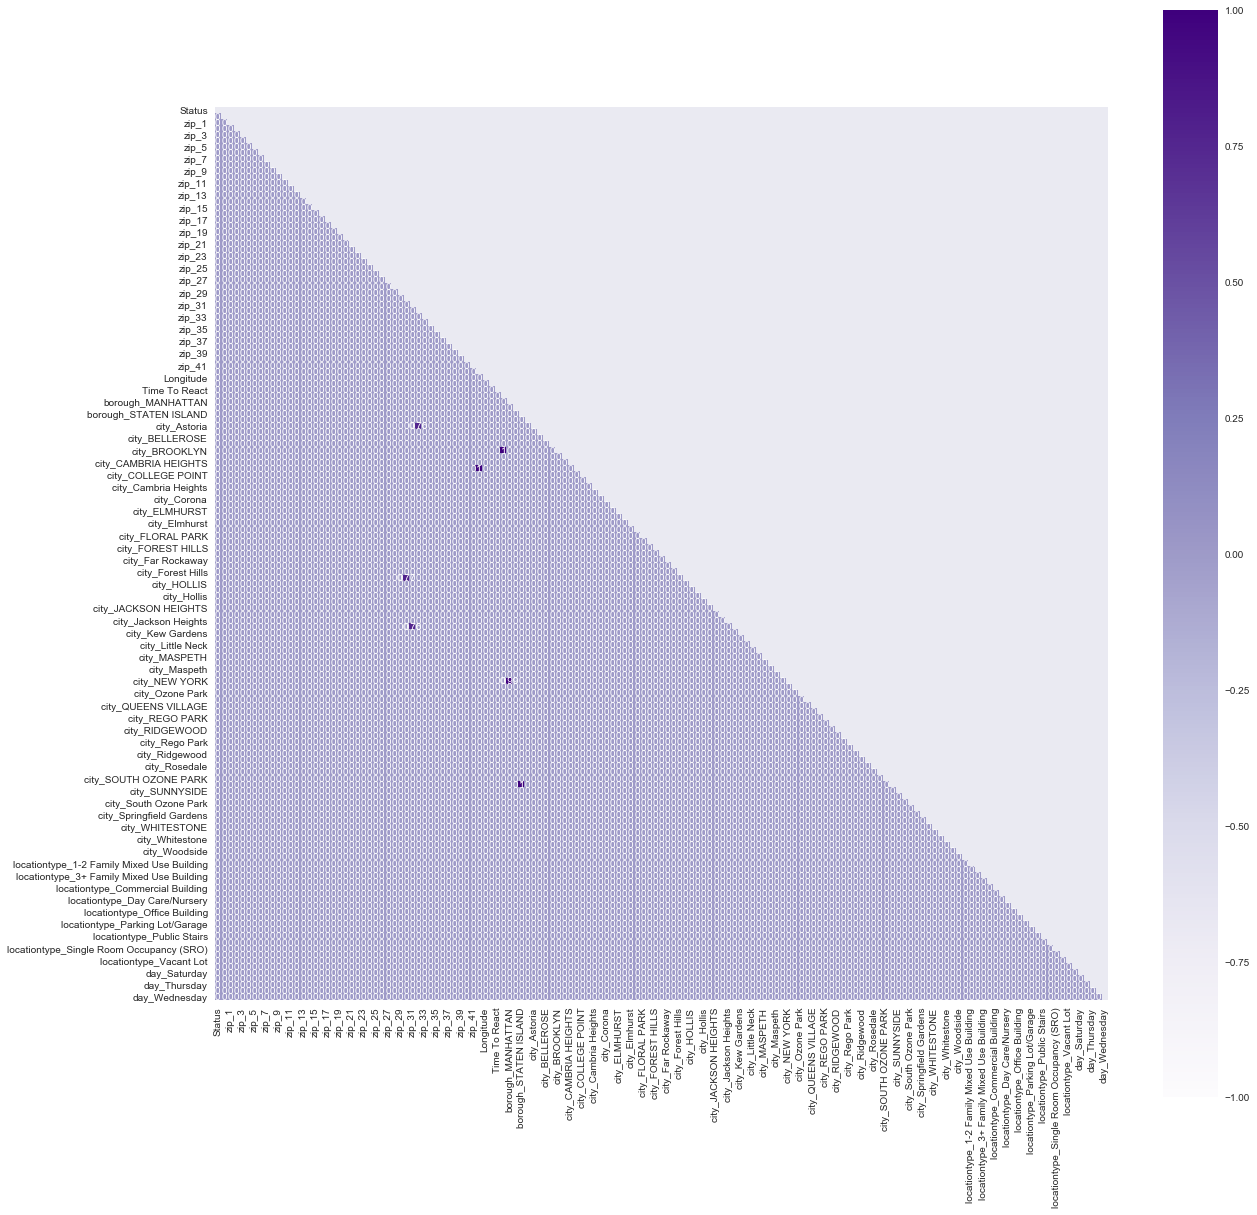

In [27]:
plt.figure(figsize=(20, 20))
#do not display correlation values less than or equal to 0.75
df_corr = df.corr()
df_corr[np.abs(df_corr)<.75] = 0
#mask upper half of matrix
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr, mask=mask, center=0, annot=True, cmap="Purples", square = True, vmin=-1)

The last step is formatting our target variable properly for our classifier models in categorical form using cat.codes.

In [28]:
#set datatype of target as category and encode column
df.Descriptor = df.Descriptor.astype('category')
df.Descriptor = df.Descriptor.cat.codes

<a id='mt'></a>

[Back to Top of Notebook](#toc)
## Model Testing and Tuning

Now that we have our dataset ready for model testing and tuning, I will use a randomizedsearch and gridsearch over specific classifiers (LogisticRegression, RandomForest and XGBoost) for predicting types of complaints so that we may find the best model to use. Since we already standardized our continous features and dealt with our categorical data, we will simply test for different parameters for our model.

I aam most interested in tuning for XGBoost, as it allows for several advantadges when classifying mutliple-class problems. XGBoost allows for regularization, helpoing to reduce overfitting. XGBoost implements parallel processing and makes splits upto a specified depth and then starts pruning the tree backwards rather than stopping when hit with a negative loss, exploring the depths of the data. XGBoost, lastly allows for cross-validation, giving me a more optimized result.

I include the other classifiers to test for difference in model performance. I will split the data into 20% validation data for our RandominzedSearch and GridSearch. Since I want to test over a lot of parameters, I use RnadomizedSearch to take model params at random so we can test various combinations of the param dictionary. I use grid search afterwards over the smaller subset of optimal params found from the RandomSearch.

##### Please note that I ran the RandomSearch and GridSearch a number of times, so the best params printed might not match the ones tested or used for the model, but come from previous runs. I have simply left the output of a sample search so you may see the format in which I recievced the information from the searches.

In [29]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Descriptor'], axis = 1), df.Descriptor, test_size=0.20, random_state=42)

In [58]:
#create empty lists to keep best clfs
best_clfs = []
for scoring in ['f1_micro', 'balanced_accuracy', 'neg_log_loss']:
    print(scoring)
    print()
    #set random state to replicate results
    random_state = 42
    #set a list of classifiers to test
    classifiers = [XGBClassifier(random_state = random_state),
                   LogisticRegression(random_state=random_state),
                   RandomForestClassifier(random_state=random_state)]
    #set our parameters for each classifier
    params = [## XGBoost
              {'learning_rate': [0.1, 0.01, 0.001,0.0001],
               'gamma' : [0.01,0.1,0.2,0.5,1,1.5,2],
               'max_depth': [2,4,6,8,10],
               'colsample_bytree': [0.3,0.6,0.8,1],
               'subsample': [0.25,0.5,0.6,0.7,0.8,0.9,1],
               'alpha': [0,0.5,1,1.5],
               'reg_lambda': [1,1.5,2,2.5,4],
               'min_child_weight': [1,3,5,6,7],
               'n_estimators': range(50, 400, 50),
               'objective': ['multi:softmax', 'multi:softprob']},

              ## LogisticRegression
              {'C':[0.001, .01, .10, 0.50, 0.75, 1.0, 10, 100],
               'penalty' : ['l1', 'l2'],
               'solver' : ['liblinear', 'newton-cg', 'saga'],
               'max_iter': [25, 50, 100, 150, 200],
               'multi_class': ['auto', 'multinomial']},

              ## RandomForest
              {'n_estimators': range(50, 400, 50),
               'criterion': ['entropy', 'gini'],
               'max_depth':[3,5,7,10,15,25,30],
               'min_samples_split': [2,5,7,10,15,100],
               'min_samples_leaf': [1,2,5,10],
               'max_features': ['auto', 'sqrt', 'log2']}]

    #for loop iterating through each combination of classifier and its parameters
    for clf,param in zip(classifiers,params):
        #conduct randomizedsearch over parameter variable with 5-fold cross-validation running on all backend workers
        gs = RandomizedSearchCV(estimator=clf,
                                param_distributions=param,
                                scoring=scoring,
                                cv=5,
                                verbose=1,
                                n_jobs=-1,
                                n_iter=20)
        #fit model
        eval_set = [(X_test, y_test)]
        gs.fit(X_train, y_train)
        #append best estimator
        best_clfs.append(gs.best_estimator_)
        #print clf and its name
        print(clf.__class__.__name__)
        #print params of best model
        print('Best params:', gs.best_params_)
        #print accuracy score of train set
        print('Train Accuracy:',gs.best_estimator_.score(X_train, y_train))
        #print accuracy score of test set
        print('Test Accuracy:',gs.best_estimator_.score(X_test, y_test))
        print('')

f1_micro

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   40.3s finished


XGBClassifier
Best params: {'subsample': 0.7, 'reg_lambda': 4, 'objective': 'multi:softmax', 'n_estimators': 50, 'min_child_weight': 7, 'max_depth': 8, 'learning_rate': 0.0001, 'gamma': 0.1, 'colsample_bytree': 1, 'alpha': 1}
Train Accuracy: 0.7438202247191011
Test Accuracy: 0.7511210762331838

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  69 out of 100 | elapsed:    1.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


LogisticRegression
Best params: {'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'auto', 'max_iter': 50, 'C': 0.75}
Train Accuracy: 0.7432584269662922
Test Accuracy: 0.7242152466367713

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.0s finished


RandomForestClassifier
Best params: {'n_estimators': 250, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy'}
Train Accuracy: 0.8151685393258427
Test Accuracy: 0.7443946188340808

balanced_accuracy

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   51.5s finished


XGBClassifier
Best params: {'subsample': 0.25, 'reg_lambda': 2, 'objective': 'multi:softmax', 'n_estimators': 350, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.6, 'alpha': 0.5}
Train Accuracy: 0.8157303370786517
Test Accuracy: 0.742152466367713

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  69 out of 100 | elapsed:    1.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.9s finished


LogisticRegression
Best params: {'solver': 'saga', 'penalty': 'l1', 'multi_class': 'auto', 'max_iter': 200, 'C': 100}
Train Accuracy: 0.7556179775280899
Test Accuracy: 0.6928251121076233

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.5s finished


RandomForestClassifier
Best params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 25, 'criterion': 'gini'}
Train Accuracy: 0.7859550561797752
Test Accuracy: 0.7488789237668162

neg_log_loss

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   39.7s finished


XGBClassifier
Best params: {'subsample': 1, 'reg_lambda': 2, 'objective': 'multi:softprob', 'n_estimators': 350, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.6, 'alpha': 1.5}
Train Accuracy: 0.798876404494382
Test Accuracy: 0.7466367713004485

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  69 out of 100 | elapsed:    1.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


LogisticRegression
Best params: {'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'auto', 'max_iter': 150, 'C': 0.1}
Train Accuracy: 0.7292134831460674
Test Accuracy: 0.7466367713004485

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.3s finished


RandomForestClassifier
Best params: {'n_estimators': 350, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 15, 'criterion': 'entropy'}
Train Accuracy: 0.7617977528089888
Test Accuracy: 0.7556053811659192



In [69]:
#set random state to replicate results
random_state = 42
#set a list of classifiers to test
classifiers = XGBClassifier(random_state = random_state, objective= 'multi:softmax', n_estimators= 50)

#set our parameters for each classifier
params = {'learning_rate': [0.001,0.002,0.01],
           'gamma' : [0.1,0.2],
           'max_depth': [8,9,10],
           'colsample_bytree': [0.6,1],
           'subsample': [0.8,0.85,0.9],
           'alpha': [0,1,1.5,2],
           'reg_lambda': [2,3],
           'min_child_weight': [1,3,5]}

#conduct gridsearch over parameter variable with 3-fold cross-validation running on all backend workers
gs = GridSearchCV(estimator=classifiers,
                        param_grid=params,
                        scoring='f1_micro',
                        cv=3,
                        verbose=1,
                        n_jobs=-1)
#fit model
eval_set = [(X_test, y_test)]
gs.fit(X_train, y_train)
#print clf and its name
print(classifiers.__class__.__name__)
#print params of best model
print('Best params:', gs.best_params_)
#print accuracy score of train set
print('Train Accuracy:',gs.best_estimator_.score(X_train, y_train))
#print accuracy score of test set
print('Test Accuracy:',gs.best_estimator_.score(X_test, y_test))
print('')

Fitting 3 folds for each of 2592 candidates, totalling 7776 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 7776 out of 7776 | elapsed: 20.3min finished


XGBClassifier
Best params: {'alpha': 0, 'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 1, 'reg_lambda': 2, 'subsample': 0.9}
Train Accuracy: 0.801123595505618
Test Accuracy: 0.7533632286995515



<a id='cm'></a>

[Back to Top of Notebook](#toc)
## Choice of Model

From my gridsearch, I found two lists of model parameters I will choose between. The first had a train accuracy score of 80.1% and a test accuracy score of 75.3%. The second had a train accuracy of 80.6% and a test accuracy of 74.7%.

To determine which model to use, I plot the confusion matrix and classification reports of both models.

In [30]:
#set datasets for model
X = df.drop('Descriptor', axis = 1)
y = df.Descriptor

model = XGBClassifier(subsample =  0.9, reg_lambda =  2, objective = 'multi:softmax', n_estimators = 50, min_child_weight = 1, max_depth = 10, learning_rate = 0.01, gamma = 0.1, colsample_bytree = 0.6, alpha = 0, random_state = 42)
model.fit(X_train, y_train)

predictions = list(model.predict(X_test))

print()
print()
#print test accuracy score
print('Accuracy Score: ')
print(accuracy_score(y_test, predictions))
print()
print()
#print classification report
print('Report: ')
print(classification_report(y_test, predictions))



Accuracy Score: 
0.7533632286995515


Report: 
              precision    recall  f1-score   support

           0       0.69      0.13      0.21        71
           1       0.76      0.98      0.86       331
           2       0.17      0.02      0.04        44

    accuracy                           0.75       446
   macro avg       0.54      0.38      0.37       446
weighted avg       0.69      0.75      0.68       446



In [31]:
model = XGBClassifier(subsample =  0.85, reg_lambda =  1, objective = 'multi:softmax', n_estimators = 50, min_child_weight = 1, max_depth = 10, learning_rate = 0.002, gamma = 0.2, colsample_bytree = 1, alpha = 1, random_state = 42)
model.fit(X_train, y_train)

predictions = list(model.predict(X_test))

print()
print()
#print test accuracy score
print('Accuracy Score: ')
print(accuracy_score(y_test, predictions))
print()
print()
#print classification report
print('Report: ')
print(classification_report(y_test, predictions))



Accuracy Score: 
0.7466367713004485


Report: 
              precision    recall  f1-score   support

           0       0.59      0.18      0.28        71
           1       0.78      0.96      0.86       331
           2       0.20      0.07      0.10        44

    accuracy                           0.75       446
   macro avg       0.52      0.40      0.41       446
weighted avg       0.69      0.75      0.69       446



For the first model with higher test accuracy, we can see that the model is giving up specificity for sensitivity as our precision is a greater value for Mouse Sightings, giving us a better accuracy score overall. However, the second model, with one less percent accuracy score, gives up precision to have a more even distribution among the f1-scores for all three classes. When we fit over all our data below, we may reinforce the fact that our f1-score and accuracy benefits from the trade-off of precision for recall, as the f1-score for Mouse Sightings only decreases by 0.02, while the f1-score of our Signs of Rodents increases by 0.10.

0.7946990116801438

Confusion Matrix: 


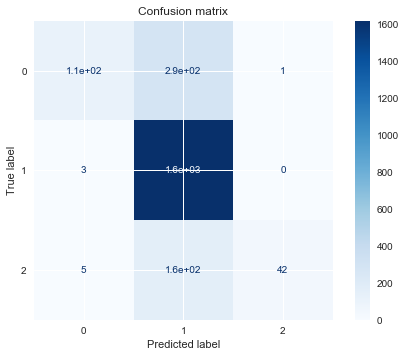



Accuracy Score: 
0.7946990116801438


Report: 
              precision    recall  f1-score   support

           0       0.93      0.28      0.42       396
           1       0.78      1.00      0.88      1621
           2       0.98      0.20      0.33       209

    accuracy                           0.79      2226
   macro avg       0.90      0.49      0.55      2226
weighted avg       0.83      0.79      0.75      2226



In [32]:
model = XGBClassifier(subsample =  0.9, reg_lambda =  2, objective = 'multi:softmax', n_estimators = 50, min_child_weight = 1, max_depth = 10, learning_rate = 0.01, gamma = 0.1, colsample_bytree = 0.6, alpha = 0, random_state = 42)
model.fit(X, y)

display(accuracy_score(y, list(model.predict(X))))

predictions = list(model.predict(X))

#plot confusion matrix
print('Confusion Matrix: ')
plot_confusion_matrix(model, X, y, cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.show()
print()
print()
#print test accuracy score
print('Accuracy Score: ')
print(accuracy_score(y, predictions))
print()
print()
#print classification report
print('Report: ')
print(classification_report(y, predictions))

Confusion Matrix: 


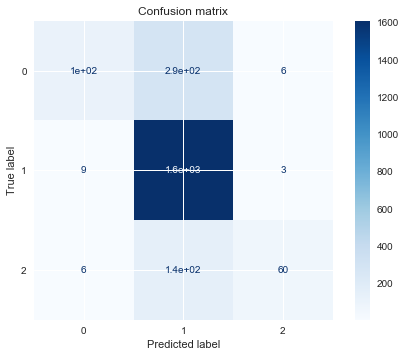



Accuracy Score: 
0.7964959568733153


Report: 
              precision    recall  f1-score   support

           0       0.87      0.26      0.40       396
           1       0.79      0.99      0.88      1621
           2       0.87      0.29      0.43       209

    accuracy                           0.80      2226
   macro avg       0.84      0.51      0.57      2226
weighted avg       0.81      0.80      0.75      2226



In [33]:
#fit final model
model = XGBClassifier(subsample =  0.85, reg_lambda =  1, objective = 'multi:softmax', n_estimators = 50, min_child_weight = 1, max_depth = 10, learning_rate = 0.002, gamma = 0.2, colsample_bytree = 1, alpha = 1, random_state = 42)
model.fit(X, y)

#serialize model
filename = 'finalized_model.dat'
pickle.dump(model, open(filename, 'wb'))

predictions = list(model.predict(X))

#plot confusion matrix
print('Confusion Matrix: ')
plot_confusion_matrix(model, X, y, cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.show()
print()
print()
#print test accuracy score
print('Accuracy Score: ')
print(accuracy_score(y, predictions))
print()
print()
#print classification report
print('Report: ')
print(classification_report(y, predictions))

In [ ]:
#de-serialize model
model = pickle.load(open('finalized_model.dat', 'rb'))

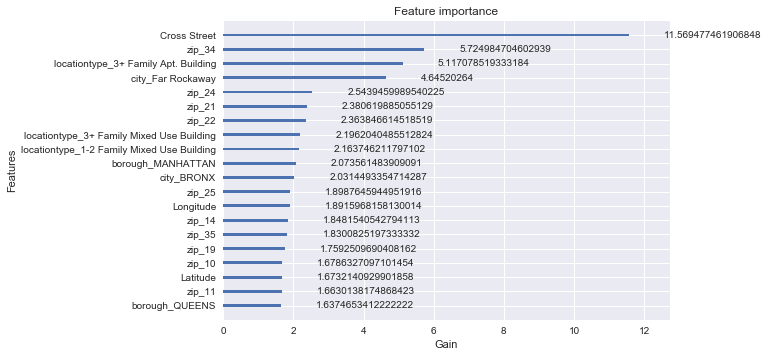

In [34]:
#get features names for model
model.get_booster().feature_names = list(X.columns)
#plot feature importance using gain as metric
ax = plot_importance(model, max_num_features = 20, importance_type = "gain", xlabel = 'Gain')
ax.figure.savefig('FeatureImportance.png')

F-score relates to the frequency/over weight of our features, which is the percentage of the relative number of times a feature is present in the trees of the model. Gain, however, is the relative contribution of the feature taken by all of our feature’s contribution for each tree in the model. Gain shows the overall improvement in accuracy brought by a feature to the branches it is on.

Therefore, I would say Gain will be the most relevant metric to interpret the importance of my features.

I have listed the top 20 features above. The most influential feature was whether the incident address had a cross street or not, meaning close proximity to other streets/buildings/people is important. The next most important feature is zipcode bin 34, which is in Northwest Queens, where more there were more Mouse Sightings and Signs of Rodents rather than Rat Sightings, probably due to the suburban nature of the neighborhood. As for Location Type, the most important was a 3+ Family Apt. Building, which we mentioned earlier was mostly comprised in Manhattan, the Bronx and Central Brooklyn.

Below, is a gridsearch to find features for a ANN to predict class. Due to lack of time to fit and train the model as well as the classifiers above, I have left this code below for later use.

In [35]:
#X = df.drop('Descriptor', axis = 1)
#X = np.array(X)
#X = X.reshape(X.shape[0], X.shape[1])
#y = np_utils.to_categorical(df.Descriptor)

#parameters = {'first_neuron':[4, 16, 32],
#              'gn':[0, 0.01, 0.1],,
#              'activation':['relu', 'elu'],
#              'dropout':[0, 0.1, 0.2],
#              'optimizer':['Adam', 'Nadam'],
#              'regularizer': ['l1', 'l2', None]}
    
#def test_model(x_train, y_train, x_val, y_val, params):
#    model = Sequential()
#    model.add(GaussianNoise(params['gn'], input_shape=(147,)))
#    model.add(Dense(params['first_neuron'], activation=params['activation'], kernel_regularizer=params['regularizer']))
#    model.add(Dropout(params['dropout']))
#    model.add(Dense(3, activation='softmax'))

#    model.compile(loss='categorical_crossentropy', optimizer=params['optimizer'], metrics=['accuracy'])

#    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1) ## patience=200

#    history = model.fit(x_train, y_train, batch_size=123, validation_data=(x_val, y_val), epochs=100, verbose=1, callbacks = [es])
    
#    return history, model

#talos.Scan(X, y, model = test_model, params = parameters, experiment_name='test')

## Future Work

- Spend more time exploring possible features for closed date, created date (like time taken to close service request, etc.)
- Spend more time tuning model parameters, testing other models
- More exploration in concentration of neighborhood using street/address data (i.e. number of incidences in a 3 block radius)
- In order to add more features on location using street/address data, I would have to restrict avaiable data to only those rows with values for all features, which would make the sample size small and undesired